<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>Chapter 1 - Data Exploratory</h6>

Last Updated: December 05, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>This chapter aims to get the overview of the datasets that will has been provided on this challenge. The analysis will use the merged and updated datasets from Chapter 0 - Data Preparation. Based on the analysis, the next step to preprocess the dataset will be determined before proceeding to clustering process.</p>

<i>Please see the Glossary (filename: <u>Datathon_2021_Glossary.docx</u>) for the explanation of each column contained in the datasets.</i>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<h3>Chapter 2: Read datasets</h3>
<p>This chapter reads the merged datasets and provides a quick overview of each datasets, i.e.: the first five line of each dataset, information of the data types and the summary of all numerical values.</p>

<h5>Chapter 2.1 - Read merged datasets</h5>

In [2]:
# List of file directories
merged_filenames = [
    "datasets_merged/df_kharif_merged_full.csv",
    "datasets_merged/df_rabi_merged_full.csv"
]

In [3]:
# Store datasets in a dataframe
df = {}
for filename in merged_filenames:
    df[filename] = pd.read_csv(filename, delimiter=";",index_col = 0)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Create a function for indexing the specific dataset
def df_shorten(season):
    if  season == "kharif":
        return df[list(df.keys())[0]]
    elif season == "rabi":
        return df[list(df.keys())[1]]
    else:
        print("Data is out of range. Available season data: kharif, rabi (case sensitive)")
        return

<h5>Chapter 2.2 - Dataset overview</h5>

In [5]:
# Setup viewing parameter for dataset overview
pd.set_option('display.max_columns', None)

In [6]:
# Print datasets info
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    df[index].info()
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 511242 entries, 0 to 511241
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               511242 non-null  object 
 1   Cluster             511242 non-null  int64  
 2   District            511242 non-null  object 
 3   Sub-District        429814 non-null  object 
 4   Block               365178 non-null  object 
 5   GP                  374588 non-null  object 
 6   Season              511242 non-null  object 
 7   Crop                511242 non-null  object 
 8   Area Sown (Ha)      235991 non-null  float64
 9   Area Insured (Ha)   457488 non-null  float64
 10  SI Per Ha (Inr/Ha)  483683 non-null  float64
 11  Sum Insured (Inr)   374695 non-null  float64
 12  Indemnity Level     511242 non-null  float64
 13  2000 Yield          13682 non-null   float64
 14  2001 Yield          13664 non-

In [7]:
# Print datasets first five lines
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].head())
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
            State  Cluster   District Sub-District Block                   GP  \
0  andhra pradesh        1  anantapur        agali   NaN                agali   
1  andhra pradesh        1  anantapur        agali   NaN  akkagaladevarahalli   
2  andhra pradesh        1  anantapur        agali   NaN  hulikeradevarahalli   
3  andhra pradesh        1  anantapur        agali   NaN            inagalore   
4  andhra pradesh        1  anantapur        agali   NaN            kodihalli   

   Season   Crop  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
0  kharif  arhar       40.623418           0.168514             28750.0   
1  kharif  arhar       40.623418           0.168514             28750.0   
2  kharif  arhar       40.623418           0.168514             28750.0   
3  kharif  arhar       40.623418           0.168514             28750.0   
4  kharif  arhar       40.623418           0.168514             28750.0   

   Sum I

In [8]:
# Print datasets summary for numerical columns
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].describe())
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
             Cluster  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
count  511242.000000   235991.000000      457488.000000       483683.000000   
mean        4.812815      414.274412         150.941875        38769.584908   
std         2.889222     1188.494481         655.212038        21618.881634   
min         1.000000        0.000000           0.000000         1400.000000   
25%         2.000000       78.093023           1.404914        20524.000000   
50%         4.000000      170.689798          34.188941        36000.000000   
75%         7.000000      376.251451         147.058824        51686.000000   
max        12.000000    85824.000000       85300.000000       250000.000000   

       Sum Insured (Inr)  Indemnity Level    2000 Yield    2001 Yield  \
count       3.746950e+05    511242.000000  13682.000000  13664.000000   
mean        1.015820e+07         0.810371   1547.075772   2334.428377   
std         4.4

<h3>Chapter 3: Data exploratory</h3>
<p>This chapter contains the documents on dataset exploratory. At the end of the process, there are conclusions of next steps that need to be performed before clustering to solve the findings from dataset overview.</p>

<h5>Chapter 3.1 - Null-values</h5>
<p>Based on the datasets info, there are multiple columns on every dataset with data missing. A high-level observation indicates that only 'States', 'District', 'Season', 'Crop' and 'Indemnity Level' that consistently has 0 null-values across the files.</p>
<p>Based on the glossary, the columns can be categorised into four types:
    <ul>
        <li>Administrative level: 'State', 'Cluster', 'District', 'Sub-District', 'Block', 'GP'</li>
        <li>Season and type of crops: 'Season', 'Crop'</li>
        <li>Premium for insurance: 'Area Sown (Ha)', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level'</li>
        <li>Production yield: '20xx Yield'</li>
    </ul>
Since the Season and type of crops columns has no null-values, they will not be included on this analysis. The analysis for treatment to null-value of each category can be performed seperately.
</p>

In [9]:
# Create function to check null-values
def check_null(data):
    sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    df_check_null = {
        'Null': data.isna().sum(),
        'Non-null': data.count(),
    }
    return pd.DataFrame(df_check_null).transpose()

In [10]:
# Define columns based on categories
cols_administrative = ['State', 'Cluster', 'District', 'Sub-District', 'Block', 'GP']
cols_season_and_crops = ['Season', 'Crop']
cols_insurances = ['Area Sown (Ha)', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level']
cols_production = ['13:'] # The production year available on each files are different.

<h6>3.1.1a Null-values on administrative levels for Kharif Season</h6>

,State,Cluster,District,Sub-District,Block,GP
Null,0,0,0,81428,146064,136654
Non-null,511242,511242,511242,429814,365178,374588


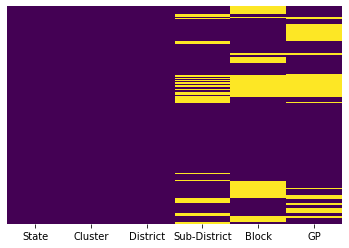

In [12]:
# Overview of null values on Kharif dataset
check_null(df_shorten("kharif")[cols_administrative])

<h6>3.1.1b Null-values on administrative levels for Rabi Season</h6>

,State,Cluster,District,Sub-District,Block,GP
Null,0,31,0,19034,69168,125188
Non-null,616791,616760,616791,597757,547623,491603


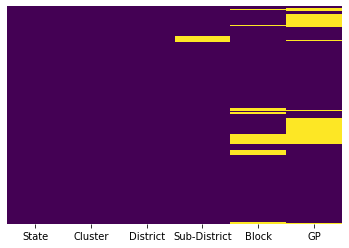

In [13]:
# Overview of null values on Rabi dataset
check_null(df_shorten("rabi")[cols_administrative])

<h6>Next step for missing values on administrative levels:</h6>
<p>Administrative level data are used to analyse the granularity of the data. Since the values in administrative level columns are categorical, additional data is required to fill in the missing values.</p>
<p>As the Glossary explained, <b>most calculation are performed on District level</b>, e.g.: averaging the historical production yield. Thus, the missing value below District level can be considered not significant for this analysis.</p>
<hr>

<h6>3.1.2a Null-values on insurances parameters for Kharif Season</h6>

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level
Null,275251,53754,27559,136547,0
Non-null,235991,457488,483683,374695,511242


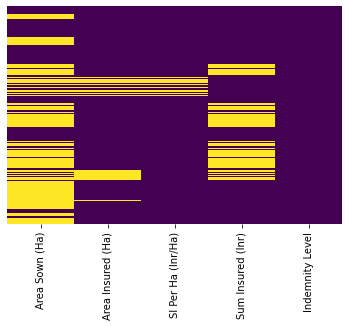

In [14]:
# Overview of null values on Kharif dataset
check_null(df_shorten("kharif")[cols_insurances])

<h6>3.1.2b Null-values on insurances parameters for Rabi Season</h6>

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level
Null,372578,59371,323,237365,0
Non-null,244213,557420,616468,379426,616791


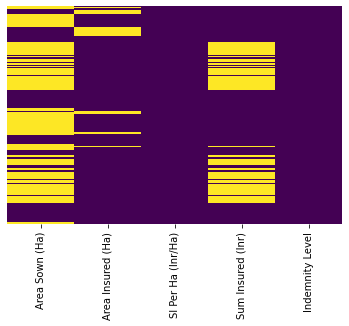

In [15]:
# Overview of null values on Rabi dataset
check_null(df_shorten("rabi")[cols_insurances])

<h6>Next step for missing values on insurances parameters:</h6>
<p>The columns that are crucial for the clustering are 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)' and 'Indemnity Level' since those values will be used to determine the 'Threshold Yield' and 'Loss Calculation'. <b>To  fill the missing values, the following formula will be utilised</b>:
<h5 align='center'> 'Sum Insured (Inr)' = 'Area Insured (Ha)' * 'SI Per Ha (Inr/Ha)' </h5>
<br/>
<p>The formula however can only be used if there is only one missing value among the three. In case there are more than 2 parameters missing, the data might be imputed by <b>cross-referencing data from other record within the same district group</b>.</p>

<h6>3.1.3a Null-values on production yield for Kharif Season</h6>

,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID
Null,497560,497578,496559,343381,347278,255215,133016,90393,86345,71415,2741,1816,2541,2672,23920,7176,108495,400886,511242,0
Non-null,13682,13664,14683,167861,163964,256027,378226,420849,424897,439827,508501,509426,508701,508570,487322,504066,402747,110356,0,511242


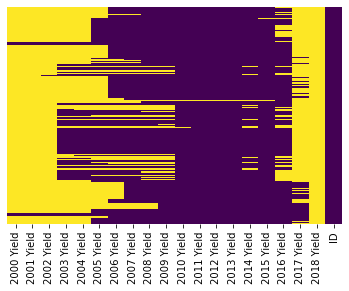

In [16]:
# Overview of null values on dataset - Kharif 2017
check_null(df_shorten("kharif").iloc[:,13:])

<h6>3.1.3b Null-values on production yield for Rabi Season</h6>

,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2000 Yield,2001 Yield,ID,2017 Yield,2018 Yield
Null,586758,229352,225921,151338,65092,54802,11555,1532,517,237,317,247,5405,94483,500885,616002,616002,0,578987,616791
Non-null,30033,387439,390870,465453,551699,561989,605236,615259,616274,616554,616474,616544,611386,522308,115906,789,789,616791,37804,0


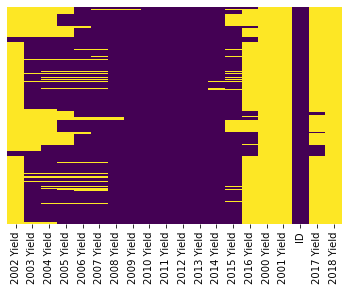

In [17]:
# Overview of null values on dataset - Rabi 2017
check_null(df_shorten("rabi").iloc[:,13:])

<h6>Next step for missing values on production yield:</h6>
<p>The production data will be used on calculating Threshold Yield and Loss Calculation is only the last 7 years of the given year. Thus, the pre-processing shall <b>exclude the columns that is out of those 7 years range.</b> However, there will be still some missing values after the exclusion of the unused columns.</p>
<p>From the glossary, there are yield columns that are filled with the average of district yield. For these columns, the <b>null-values will be filled by the average of the districts.</b></p>
<p>For the columns with more granular yield details, the treatment can be performed by:
<ul>
    <li>replacing the missing data with Mean/Median/Mode of the column, or</li>
    <li>use regression to predict the missing value</li>
</ul>
Since replacing the missing data with Mean/Median/Mode of the column adds variance and bias, the Mean/Median/Mode of the non-null values will be tested whether it can represent the whole data with 95% confidence. <b>If the statistics pass is within the 95% confidence level, the null-values shall be filled using the statistics</b>. Otherwise, the null-values shall be <b>filled using the regression of the other years.</b></p>
<b><i>Source:</i></b> <a href="https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/">https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/</a>
<hr>